# Spectrum Generation

We use the data to generate spectra for the incidence of particles on the detector

In [1]:
#Include modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from accelerate import *
from tqdm.notebook import tqdm

%matplotlib widget

In [2]:
# Read the files

# Parameters
run                     = 'run7'

# Find the files
foldername  = f'./data/{run}'
filenames   = [os.path.join(foldername,filename) for filename in os.listdir(foldername)]

# Print the number of files found
print(f'Found {len(filenames)} data files in {foldername}')

Found 2125 data files in ./data/run7


Cm244:   0%|          | 0/5 [00:00<?, ?it/s]

loadFile:   0%|          | 0/40 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/40 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/40 [00:00<?, ?it/s]

loadFile:   0%|          | 0/7 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/7 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/7 [00:00<?, ?it/s]

loadFile:   0%|          | 0/919 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/919 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/919 [00:00<?, ?it/s]

loadFile:   0%|          | 0/1115 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/1115 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/1115 [00:00<?, ?it/s]

loadFile:   0%|          | 0/44 [00:00<?, ?it/s]

getEnergy:   0%|          | 0/44 [00:00<?, ?it/s]

smearEnergy:   0%|          | 0/44 [00:00<?, ?it/s]

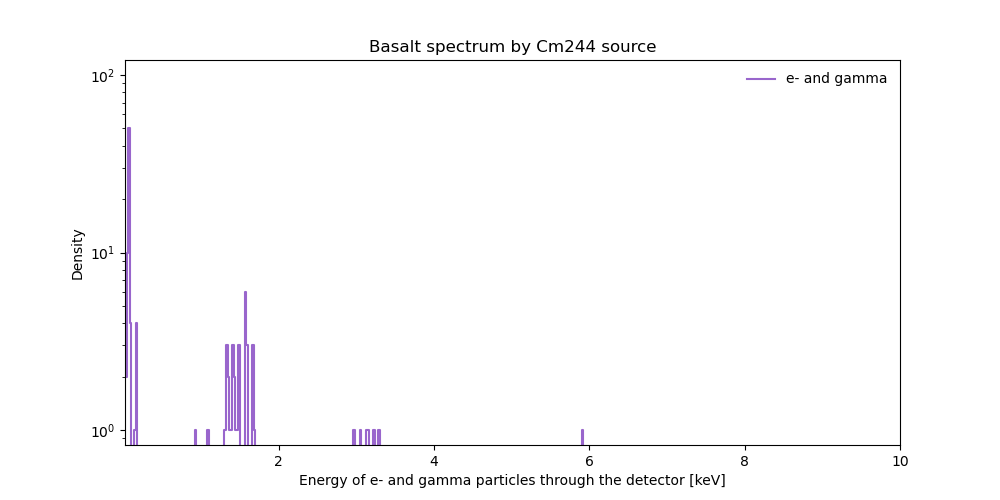

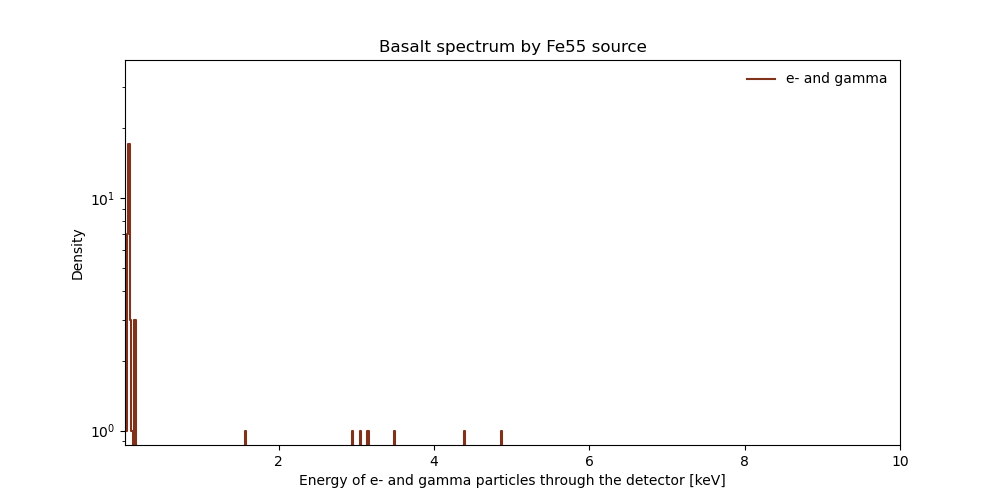

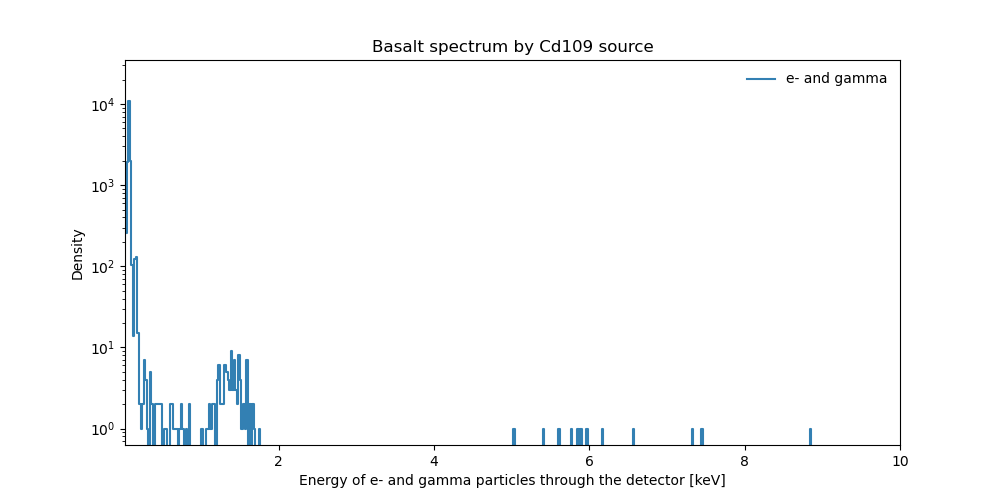

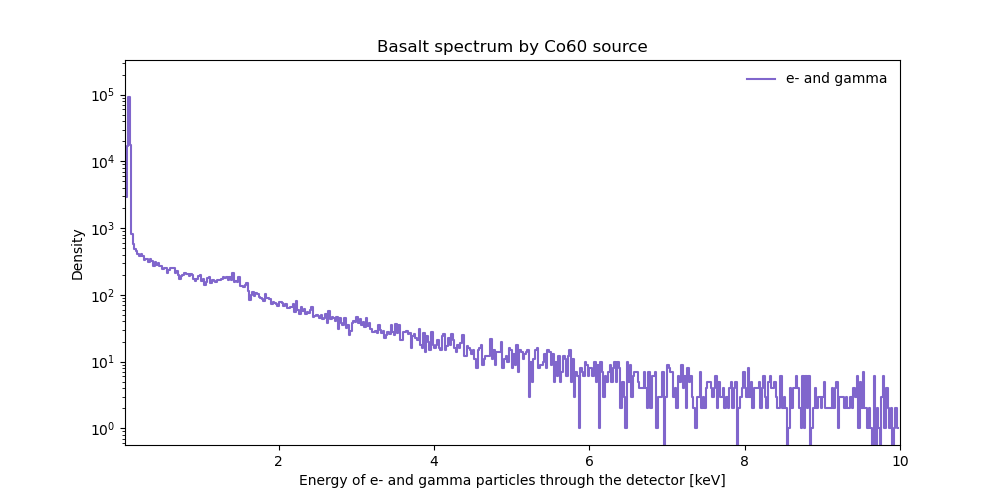

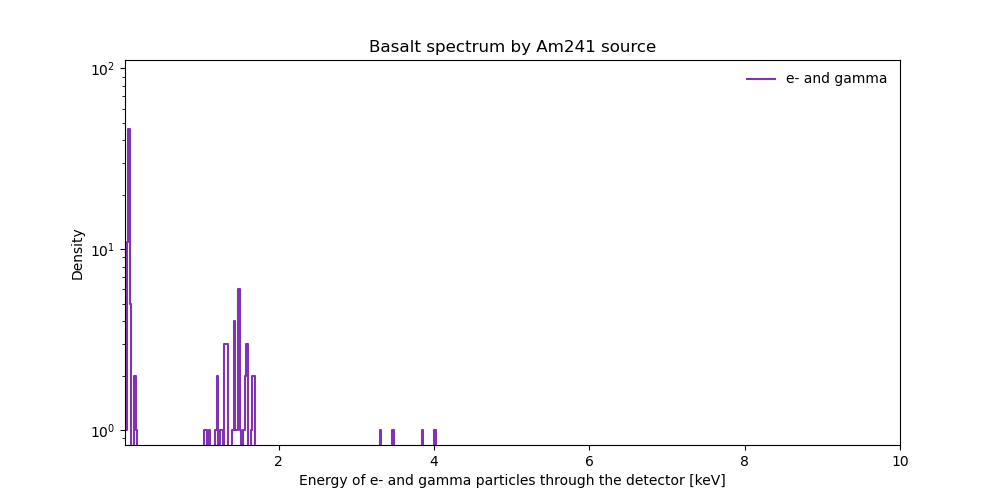

In [6]:
RUN_STRUCTURE = {
    'run0' : 'Cm244',
    'run1' : 'Fe55',
    'run2' : 'Cd109',
    'run3' : 'Co60',
    'run4' : 'Am241'
}

MATERIAL = {
    'name' : 'Basalt',
    'peaks' : {
        'FeKa' : 6.40,
        'FeKb' : 7.06,
        'TiKa' : 4.51,
        'TiKb' : 4.93,
        'SiKa' : 1.74,
        'AlKa' : 1.49,
        'MgKa' : 1.25,
        'OKa'  : 0.52,
    }
}

STD                 = 0.008
particleEnergyList  = {}
PARTICLES           = ['e-','gamma']

# For all the simulation runs
pbar = tqdm(RUN_STRUCTURE,desc=list(RUN_STRUCTURE.values())[0])
for i,run in enumerate(pbar):
    # Collect their output files
    files = loadFiles([filename for filename in filenames if run in filename])

    # Extract the energy for each particle
    particleEnergyList[run] = getParticleEnergiesSmeared(files,
        smearfunc   = smear_gaussian,
        size        = STD,
        groupBy     = 'MigrantID',
        columnName  = 'DepositedEnergy'
        )
    
    particles = None
    try:
        particles = pd.concat([particleEnergyList[run][p] for p in ['e-']])
    except:
        pass
    
    # Plot the spectrum
    if particles is not None : plotParticleHistogram(particles,
        source          = RUN_STRUCTURE[run],
        PARTICLE        = ' and '.join(PARTICLES),
        MATERIAL        = MATERIAL,
        SHOW_MATERIAL   = False,
        LIMS            = (0,10),
        MAX_PEAKS       = 0,
        NBINS           = 500,
        SAVE            = True,
        yscale          = 'log')

    # Change the description of the progress bar to show the material processed
    try:
        pbar.set_description(list(RUN_STRUCTURE.values())[i+1])
    except:
        pass

In [4]:
print("The unique particles are:")
for run in particleEnergyList:
    print(f'{run}:',[[particle, len(particleEnergyList[run][particle])] for particle in particleEnergyList[run]])

The unique particles are:
run0: [['e-', 193], ['gamma', 40], ['neutron', 1]]
run1: [['e-', 75], ['gamma', 7]]
run2: [['e-', 34881], ['gamma', 1180]]
run3: [['e-', 323291], ['gamma', 116]]
run4: [['e-', 183], ['gamma', 43]]
